<h2 style='text-align:center;font-size:80px;background-color:teal;border:80px;color:white'>   Customer Churn Analysis Project . <h2>

# Problem Statement

### Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

### Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

### Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

### You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
# Reading the csv file from dataset
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### The dataset contains the details of customers in which both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so it will be termed as "Classification problem" where we need to predict the several customer churn using the classification models.

In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5407,9786-YWNHU,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,No
6422,8668-KNZTI,Male,0,No,No,52,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Electronic check,53.75,2790.65,No
4115,7247-XOZPB,Male,0,Yes,No,53,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),77.40,4155.95,No
1749,1320-REHCS,Male,1,No,No,52,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.75,5832,No


In [5]:
df.shape

(7043, 21)

#### There are 7043 rows and 21 columns in dataset

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### So dataset have both categorical and numerical cplumns

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:orange'> EDA <h2>

In [7]:
# To get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### So count of all column are 7043 which means there are no null value..and there are three type of data present in datasetset 1 float64, 2 int64, 18 object.. we will encode categorical column later...

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### These are columns names present in dataset in which churn is target variable and rest are features

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### there are no null value

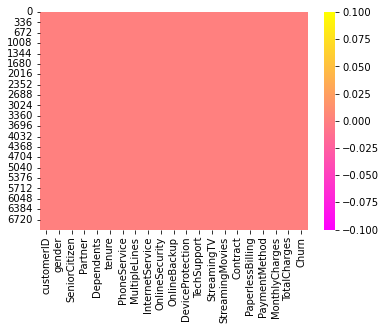

In [10]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="spring")
plt.show()

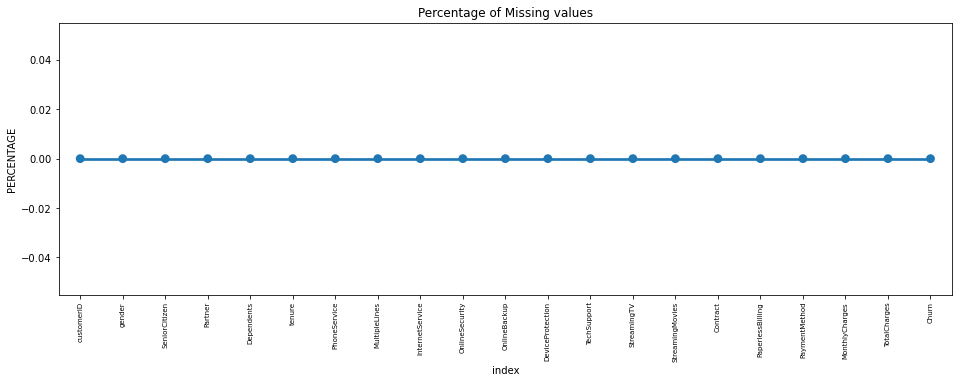

In [11]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### Line is straight which means there is no nana value

In [12]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('---------------------------------------------------------------------------------------')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64



---------------------------------------------------------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64



---------------------------------------------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64



---------------------------------------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64



---------------------------------------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64



---------------------------------------------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0     

In [13]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### We can observe that the "TotalCharges" has continuous data but when we checked the data type its showing object data type due to some reason also if we notice the value counts, 11 rows of this column has blank data. Let's handle this column.

In [14]:
# Checking the space in TotalCharges column as 11 rows have been left without any Explanation
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### We can see left spaces in total charges so lets fill it with np.nan ,so that we can know it is a missing value


In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

#### Now we have replaced all the missing value with np.nan ,so Now lets fill the nan value but before filling the nan value lets convert the data type of TotalCharge which is in object to float time as it is format of continous data

In [16]:
# Converting object data type to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [17]:
#Now Lets check null values again 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### lets fill nan value with median 

In [18]:
print ("Median :-" ,df["TotalCharges"].median())
# Filling null values in TotalCharges with its mean 
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

Median :- 1397.475


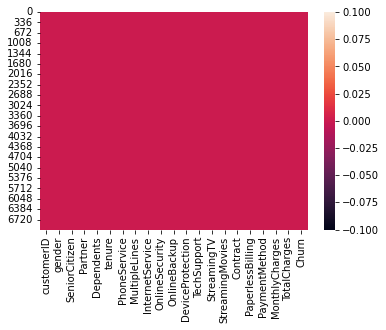

In [19]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="rocket")
plt.show()

#### No Null value

In [20]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### TotalCharges ddata type has changed to float64

In [21]:
# Lets Check again Churn Value Count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### There are two categories in the column Churn namely No and Yes. We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

#### And target variable seems to be imbalanced which we will balance later

In [22]:
# Separating numerical and categorcal columns

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)


Categorical columns are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


#### Lets drop customerID as it is unique ID given to each customer which is of no use in prediction...

In [23]:
# Drop alert
df.drop('customerID',axis=1,inplace=True)

In [24]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:orange'> A. Univariate Analysis <h2>

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Male      3555
Female    3488
Name: gender, dtype: int64


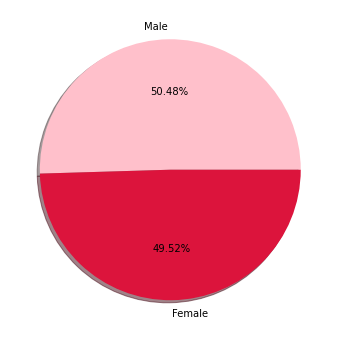

In [26]:
#Visualize the count of Gender
print(df['gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(6,6))
colors=["pink","crimson"]
ax.pie(df['gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()


#### So count of both gender are pretty same.. but still male is little bit more than female

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


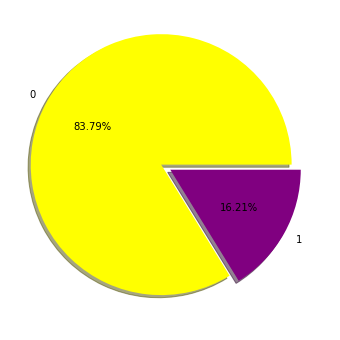

In [27]:
#Visualize the count of Gender
print(df['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["yellow","purple"]
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()


#### Here 0 represents the non senoir citizens and 1 represents the senior citizens. The count of 0 is high in data compared to 1 which means the number non seniorcitizens are quite high compared to senior citizens data in the given dataset. Around 83% of the customers are non senior citizens and only 16% are senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


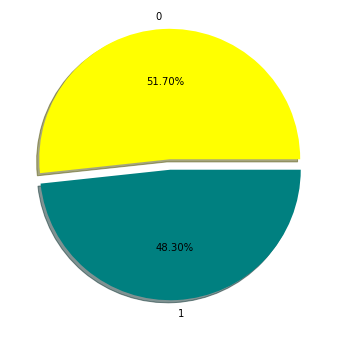

In [28]:
#Visualize the count of Gender
print(df['Partner'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["yellow","teal"]
ax.pie(df['Partner'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()


#### So here 0 means who do not have partner and 1 means who have partner... both are almost equal but no partner people are higher than people having partner

No     4933
Yes    2110
Name: Dependents, dtype: int64


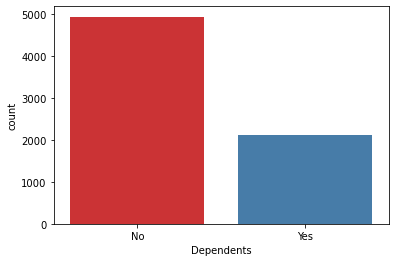

In [29]:
#Visualizing how many customers have their partners
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"],palette="Set1")
plt.show()


#### So here people who have dependents on them are less and people who do not have dependents are more

Yes    6361
No      682
Name: PhoneService, dtype: int64


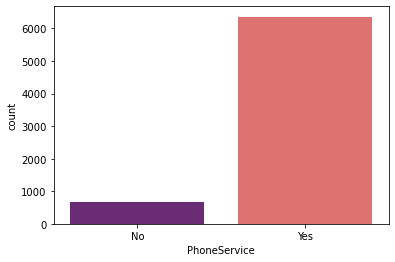

In [30]:
#Visualizing how many customers have Phone Service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="magma")
plt.show()


#### So people who have Phone service are higher in number than a people who dont have phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


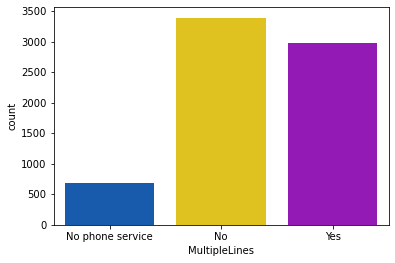

In [31]:
#Visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="prism")
plt.show()


#### The customers who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


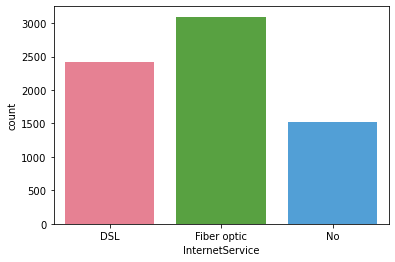

In [32]:
#Visualizing how many customers have Internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="husl")
plt.show()


#### Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not get an internet service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


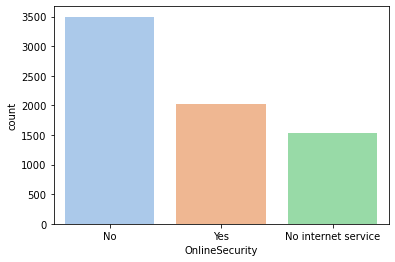

In [33]:
#Visualizing how many customers have OnlineSecurity
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="pastel")
plt.show()


#### WE can say that people who have internet service needs online security whereas people who do not have internet service dont need online security..But we can see in plot that most of people who have internet do not use online security

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


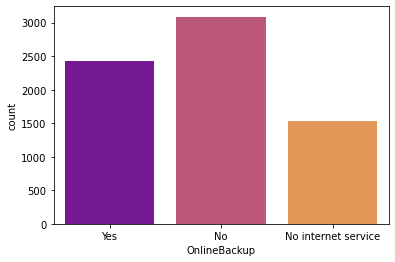

In [34]:
#Visualizing how many customers have OnlineBackup
print(df["OnlineBackup"].value_counts())
sns.countplot(df["OnlineBackup"],palette="plasma")
plt.show()


#### It is obious that the customers who do not own internet services and online security, they do not need online backup usage. From the plot we can see the majority of customers who own internet services they do not have Online backup and the customers who own internet services have very less online backup. Also the customers who do not have internet services have very less online backup counts compared tp others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


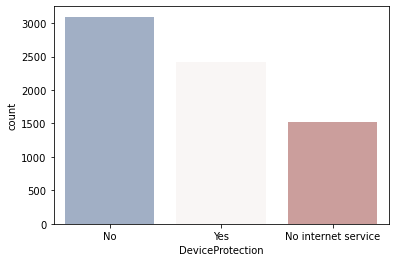

In [35]:
#Visualizing how many customers have DeviceProtection
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"],palette="vlag")
plt.show()


#### We can see in count plot that people with No device protection are higher in count as compared to people who have device protection.. and people who dont have internet service do not need devie protection

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


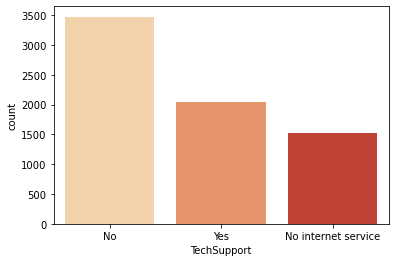

In [36]:
#Visualizing how many customers have TechSupport
print(df["TechSupport"].value_counts())
sns.countplot(df["TechSupport"],palette="OrRd")
plt.show()


#### Customer who do not need tech support are higher in number than a coustomer who needs tech support.. where as people with no internet do not need any tech support

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


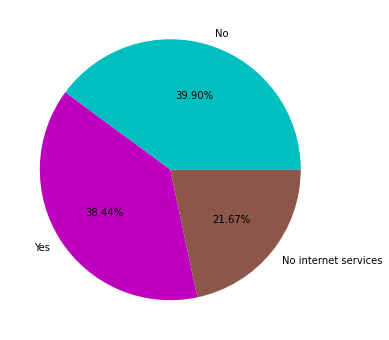

In [37]:
#Visualizing how many customers have TechSupport
print(df['StreamingTV'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["c","m","tab:brown"]
ax.pie(df['StreamingTV'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()


#### Customer who do not have streaming TV are 39.90% whereas customer who have streaming TV are 38.44%..which means customer who do not have streaming TV are higher in count than customer who have streaming tv..

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


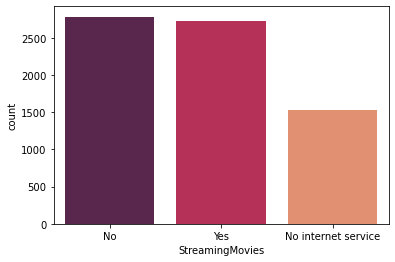

In [38]:
#Visualizing how many customers have StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="rocket")
plt.show()


#### The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


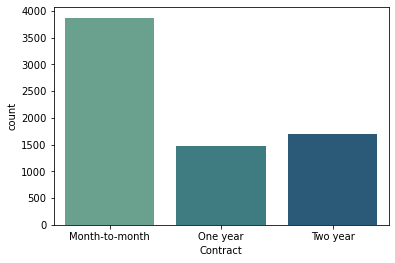

In [39]:
#Visualizing how many customers have Contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="crest")
plt.show()


#### Most of the customer opt for month to month contract in comparision to one year or two year contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


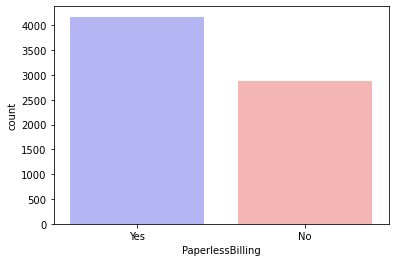

In [40]:
#Visualizing how many customers have PaperlessBilling
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"],palette="bwr")
plt.show()


#### Most of the customer prefer paperless billing in comparision to paper billing..

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


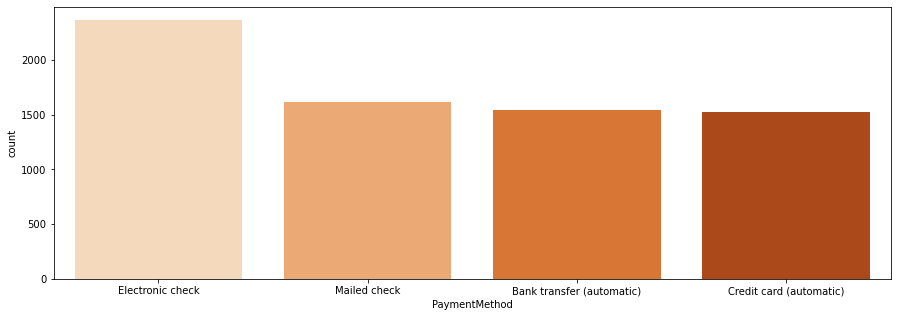

In [41]:
#Visualizing how many customers have PaymentMethod
plt.figure(figsize=(15,5))
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="Oranges")
plt.show()


#### Most of customer prefer Electronic check over any payment method like mailed check, bank transfer(automatic), credit cad(automatic)... while mailed check,bank transfer(automatic),credit card(automatic) are nearly equally choosen for payment

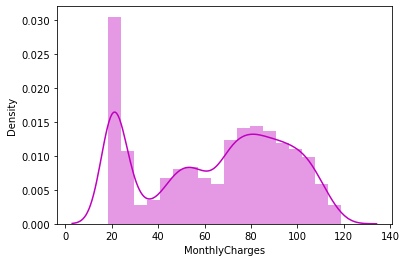

In [42]:
# Visualizing how many customers have MonthlyCharges
sns.distplot(df['MonthlyCharges'],color='m')
plt.show()

#### Customers Monthly Charges have no skewness

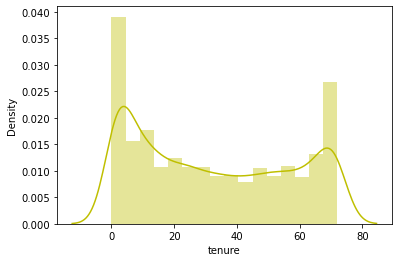

In [43]:
# Visualizing how many customers have tenure
sns.distplot(df['tenure'],color='y')
plt.show()

#### Tenure is not skewed...

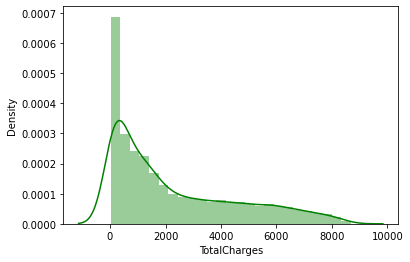

In [44]:
# Visualizing how many customers have TotalCharges
sns.distplot(df['TotalCharges'],color='g')
plt.show()

#### Customers Total Charges is skewed to right..which will be treated later..

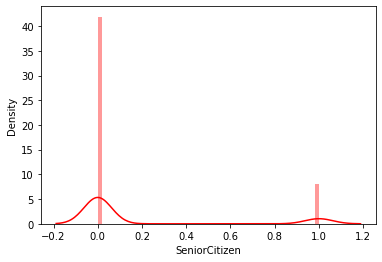

In [45]:
# Visualizing how many customers have SeniorCitizen
sns.distplot(df['SeniorCitizen'],color='r')
plt.show()

#### Senior citizen is not normally distributed...and max of data in seniorcitizen is zero(0)..

No     5174
Yes    1869
Name: Churn, dtype: int64


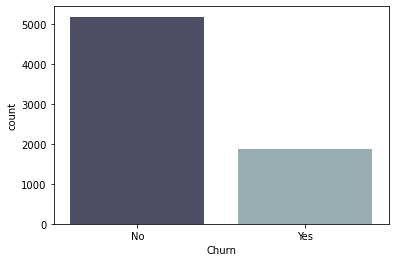

In [46]:
#Visualizing how many customers have churn
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="bone")
plt.show()


#### Customers who do not churn are higher in count than a customer who have churn.. and this is our target variable which seems to be imbalanced..

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:orange'> B. Bivariate Analysis <h2>

In [47]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

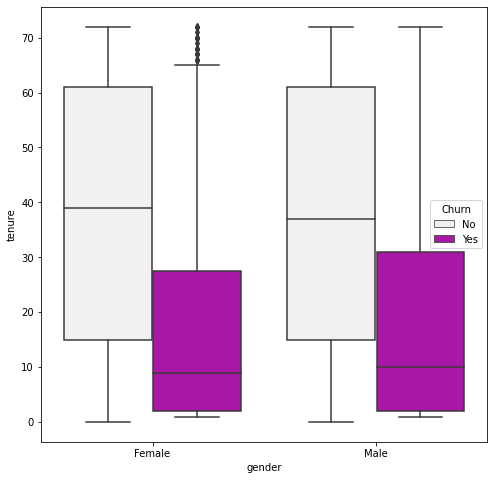

In [48]:
# Comparing gender and tenure
plt.figure(figsize=(8,8))
sns.boxplot( x = "gender",y = "tenure", data = df,hue="Churn",color='m')
plt.show()

#### Here male are more prone to churn in comparision to female in tenure of 60 years..

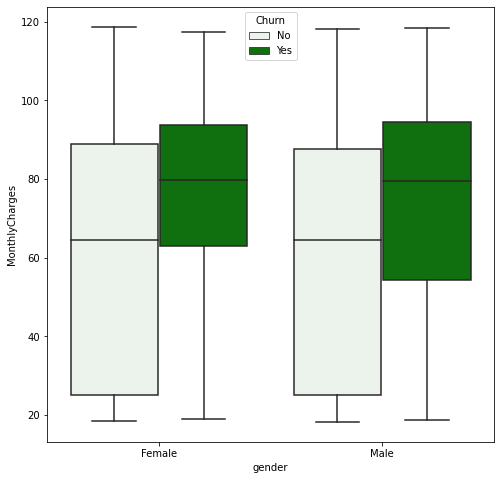

In [49]:
#Comparing gender and MonthlyCharges
plt.figure(figsize=(8,8))
sns.boxplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",color='g')
plt.show()

#### Both male and female with monthly charges above 60 have high chances to churn

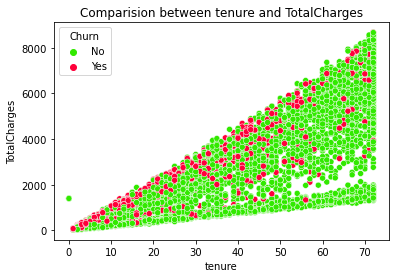

In [50]:
#Comparing tenure and TotalCharges 
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot( x = "tenure",y = "TotalCharges", data = df,hue="Churn",palette="prism")
plt.show()


#### So here tenure and totalcharges have have linear relationship...when tenure increases total charges increases.. customers with less tenure service are more likely to churn

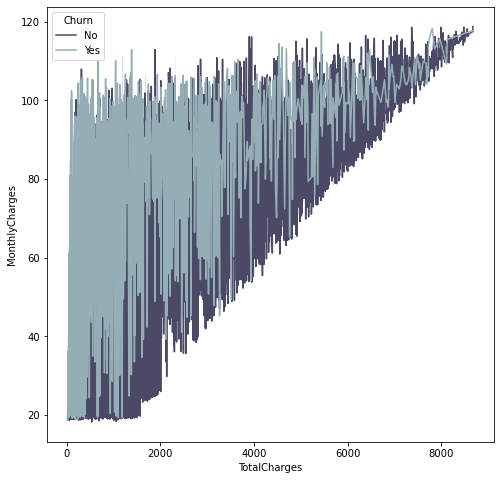

In [51]:
#Comparing monthlycharges and TotalCharges
plt.figure(figsize=(8,8))
sns.lineplot( y = "MonthlyCharges",x = "TotalCharges", data = df,hue="Churn",palette="bone")
plt.show()

#### monthlycharges and totalcharges have linear relationship... as monthly charges increases total charges also increases.. The customers with high monthly charges have high tendancy to stop the services since they have high total charges. Also  if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

<Figure size 720x720 with 0 Axes>

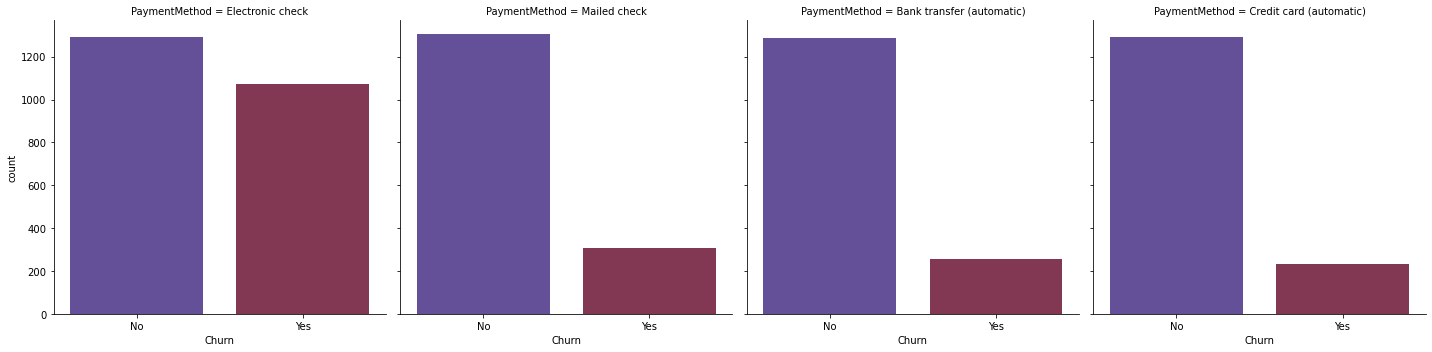

In [52]:
#Copmparision Churn and PaymentMethod
plt.figure(figsize=(10,10))
sns.catplot(x='Churn',col='PaymentMethod',data=df,palette="twilight",kind="count")
plt.show()

#### Customer who get paid through Electronic Check have highest churn..whereas other payment method have nearly equal churn..

<Figure size 576x576 with 0 Axes>

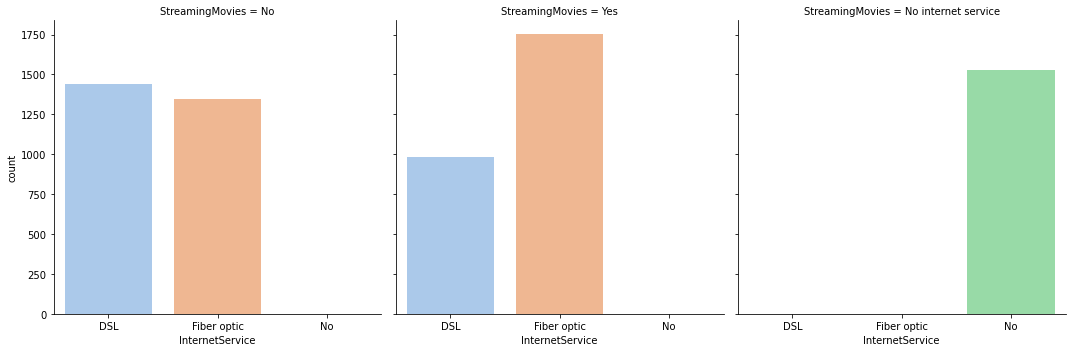

In [53]:
#comparing InternetService and StreamingMovies
plt.figure(figsize=(8,8))
sns.catplot(x='InternetService',col='StreamingMovies',data=df,palette="pastel",kind="count")
plt.show()

#### Customers with Fiber optic Internet service are highest in streaming movies followed by DSL..whereas customers with no internet service are are not all streaming movies

<Figure size 576x576 with 0 Axes>

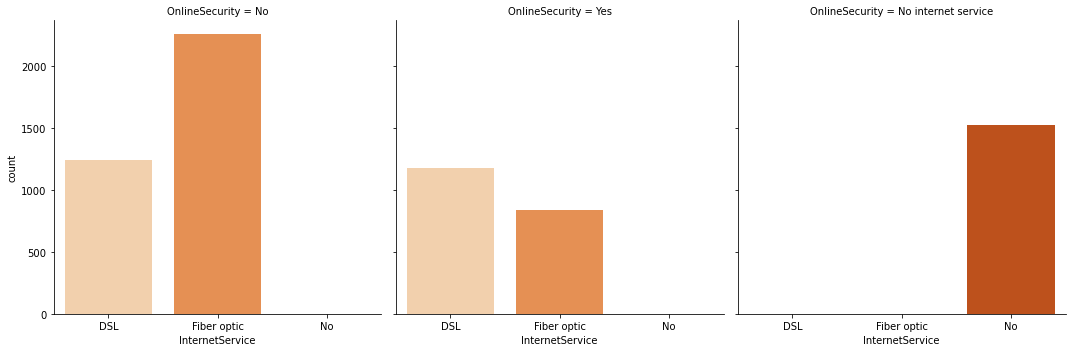

In [54]:
#Comparing InternetService and OnlineSecurity
plt.figure(figsize=(8,8))
sns.catplot(x='InternetService',col='OnlineSecurity',data=df,palette="Oranges",kind="count")
plt.show()

#### Customers who opted for onlinesecurity is highest from DSL internet service followed by Fiber Optic internet services...and customers with no internet services do no need online security

<Figure size 576x576 with 0 Axes>

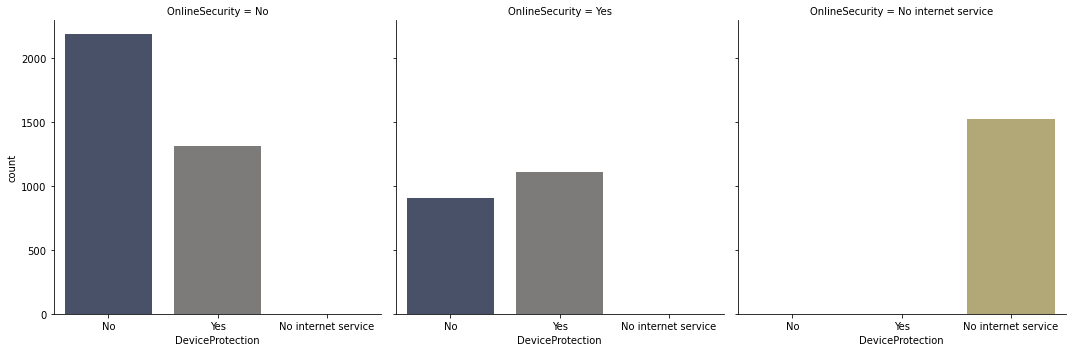

In [55]:
#Comparing DeviceProtection and OnlineSecurity
plt.figure(figsize=(8,8))
sns.catplot(x='DeviceProtection',col='OnlineSecurity',data=df,palette="cividis",kind="count")
plt.show()

#### We get to know that it is on the will of customer to opt for either Online Security and Device protection or both at a same time.. Here customer who have not taken online security but have taken Device protection above 1250 counts and the one who have opted for online security and have taken Device protection too is little less than the one who have not taken Online Security

<AxesSubplot:xlabel='Dependents', ylabel='tenure'>

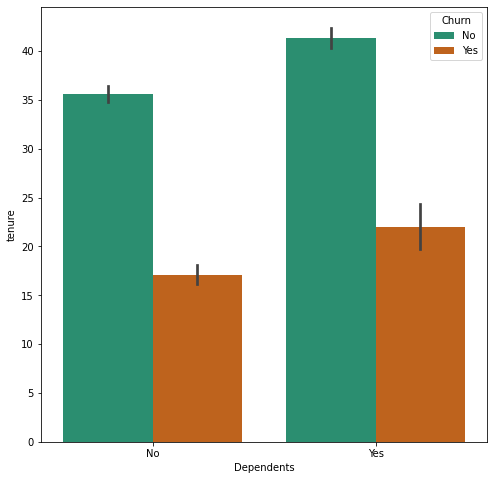

In [56]:
# Checking Churn level in tenure
plt.figure(figsize=(8,8))
sns.barplot(x='Dependents',y='tenure',data=df,palette="Dark2",hue="Churn")


#### The customers who have dependents with high tenure, then the churned level is high..

<Figure size 576x576 with 0 Axes>

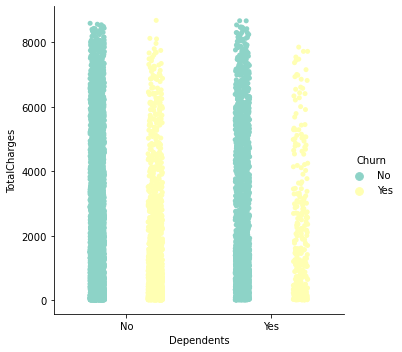

In [58]:
# Checking Churn level in TotalCharges
plt.figure(figsize=(8,8))
sns.catplot(x='Dependents',y='TotalCharges',data=df,palette="Set3",hue="Churn",split=True)

#### Customer who have total charges in range of 0-2000 with dependents have high chance of churn

<AxesSubplot:xlabel='Dependents', ylabel='MonthlyCharges'>

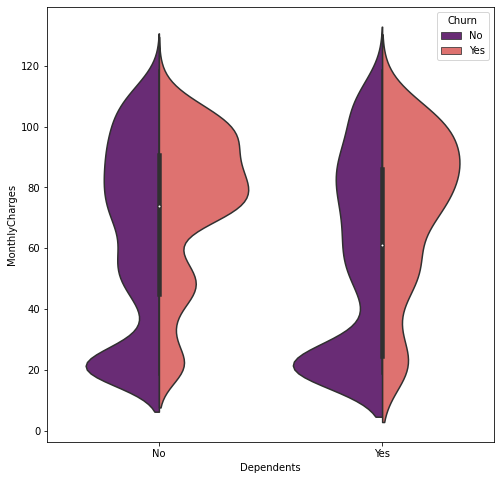

In [59]:
plt.figure(figsize=(8,8))
# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',data=df,palette="magma",hue="Churn",split=True)

#### The customers having Monthly charges between 70-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then teh ratio of churn is very high`

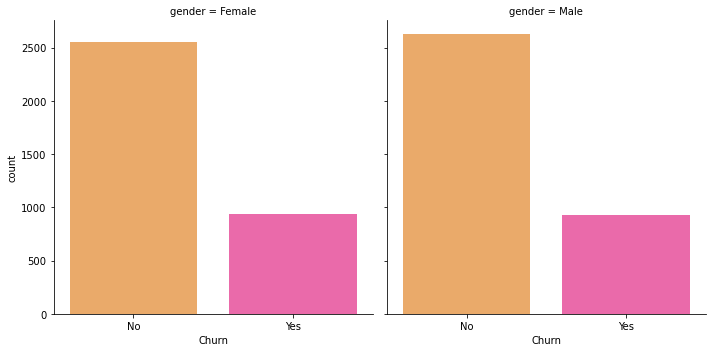

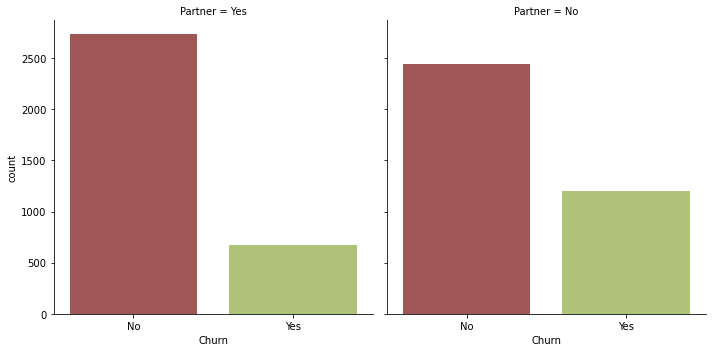

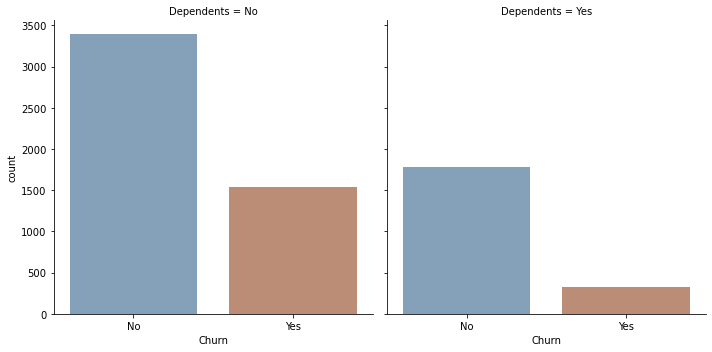

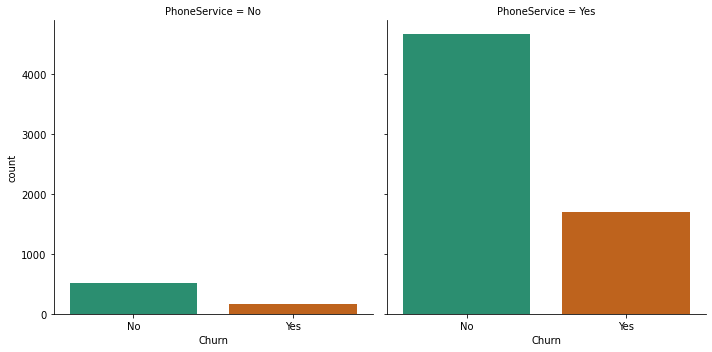

In [60]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()


#### Observation:
- In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.
- In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.
- The customers who do not have any dependency have high churn rate compared to the customers who have dependents.
- In the last plot we can notice the customers who have phone service have high tendency of getting churned.

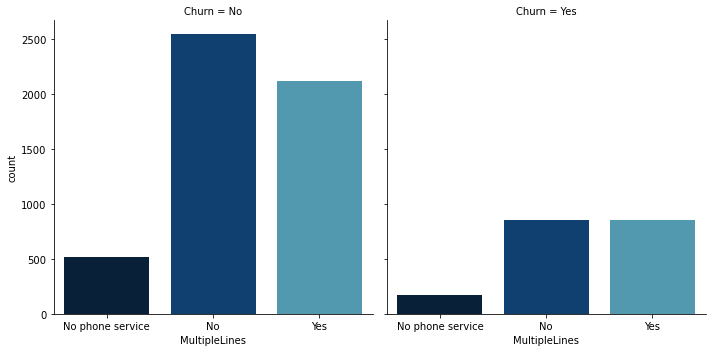

In [61]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()


#### The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

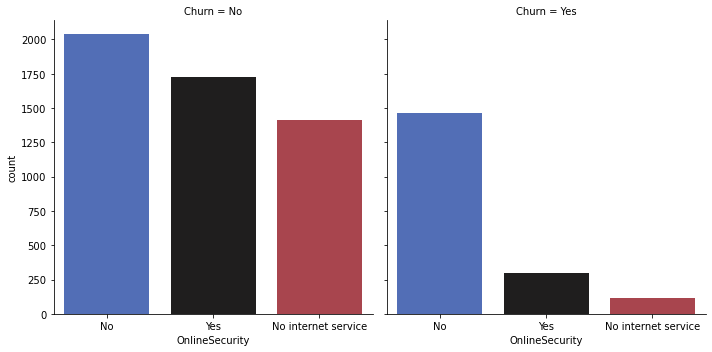

In [62]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()


#### The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

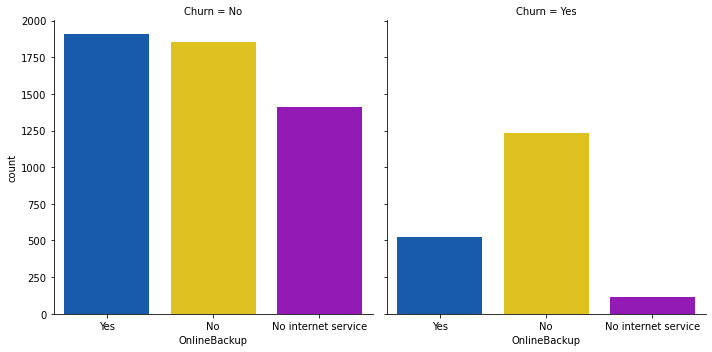

In [63]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="prism",kind="count",data=df)
plt.show()


#### It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

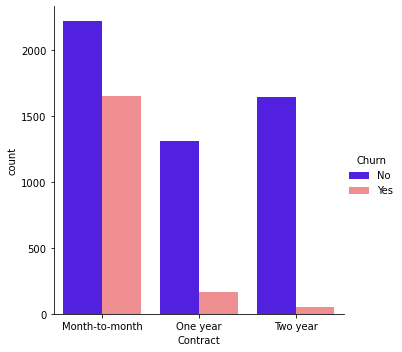

In [64]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="gnuplot2",kind="count",data=df)
plt.show()


#### The customers who have churned are mostly having month to month contract.

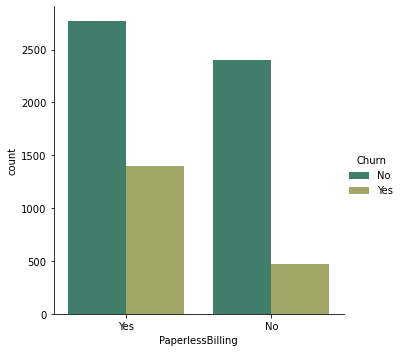

In [65]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette="gist_earth",kind="count",data=df)
plt.show()


#### The customers who prefer paperless billing they have high churn rate in comparision with customers who hav paper billing



<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:orange'> C. Multi-variate Analysis <h2>

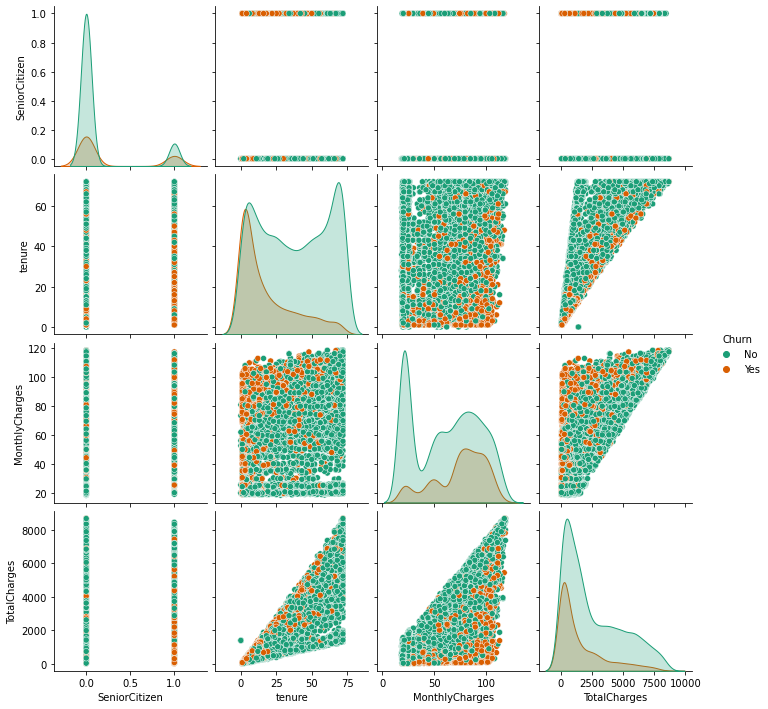

In [66]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()


#### The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots. The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other. There are no outliers in any of the columns but let's plot box plot to identify the outliers.

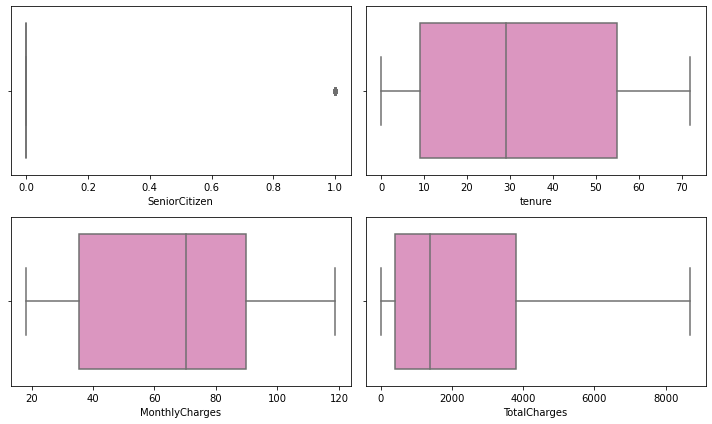

In [67]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()


#### Only column Senior citizen have outliers but it is categorical column so no need to remove outliers.. and no other columns have outliers

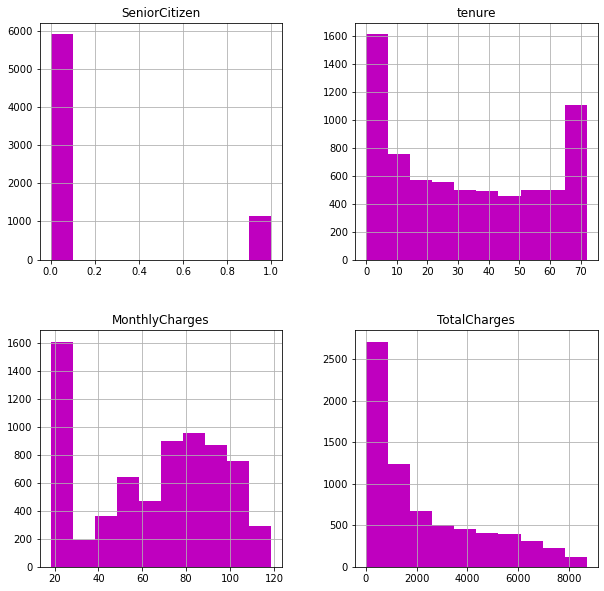

In [68]:
df.hist(bins=10, figsize=(10,10),color='m')
plt.show()

#### Column Senior citizen and Total Charges have skewness in which senior citizen is a categorical column so we will not remove skewness from this column.. and will remove skewness only from total charges..

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:orange'> CORRELATION <h2>

### lets first encode all categorical column

In [69]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [71]:
##Correlation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


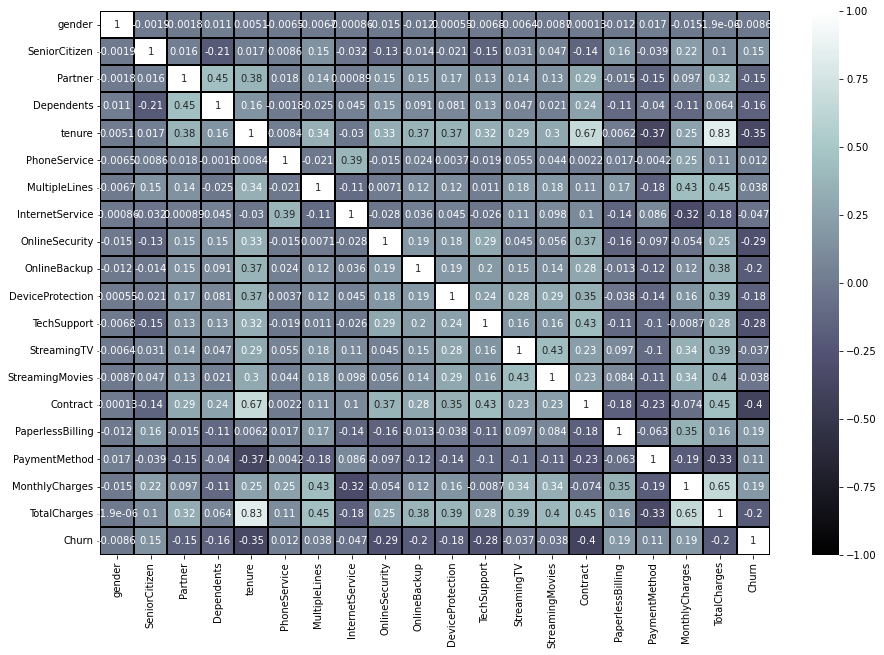

In [72]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="bone")
plt.yticks(rotation=0);

### Observation:
- This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

- There is no much positive correlation between the target and features.

- The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.

- The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

- Also the column gender has very less correlation with the label, we can drop it if necessary.



In [73]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199037
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

#### We can observe positive and negative correlation with target

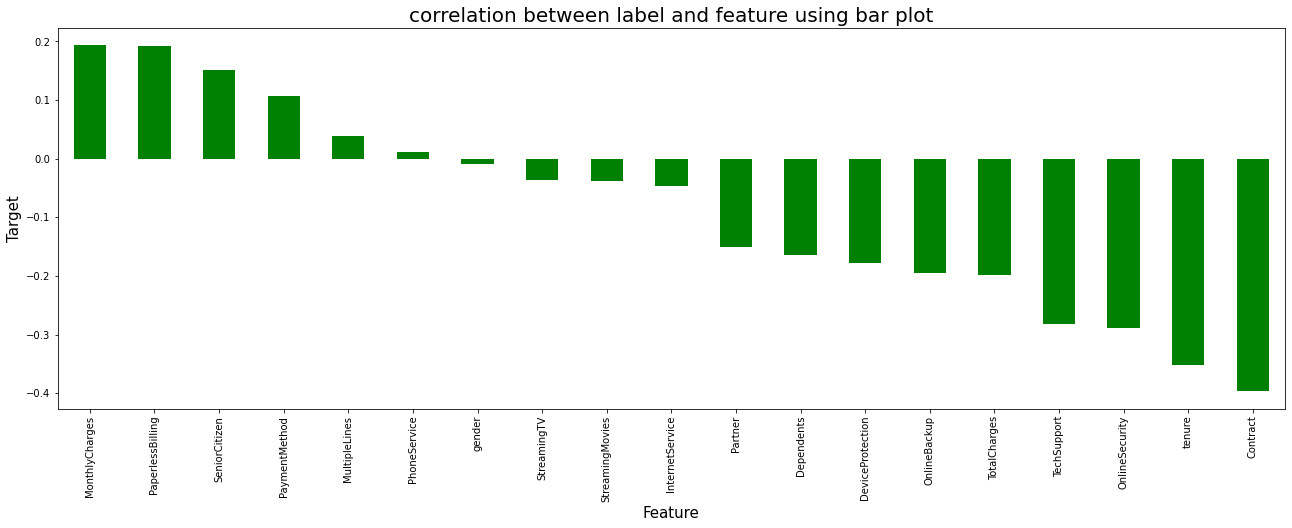

In [74]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="g")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


#### This shows features relationship with target... column gender and phone service have least relationship with target..

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:orange'> DESCRIPTIVE STATISTICS <h2>

In [75]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


#### Observation:
- This gives the statistical information of the numerical columns. The summary of this dataset looks perfect since there is no negative/ invalid values present.

- From the above description we can observe the following things.

- The counts of all the 4 columns are same which means there are no missing values in the dataset.

- The mean value is greater than the median(50%) in tenure and TotaCharges columns which means the data is skewed to right in these columns.

- The data in the column MonthlyCharges have mean value less than median that means the data is skewed to left.

- We can also notice the Standard deviation, min, 25% percentile values from this describe method.

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:orange'> Lets Check Skewness <h2>


In [76]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

# Lets remove Skewness

In [77]:
# Removing skewness 
df["TotalCharges"] =np.cbrt(df["TotalCharges"])
df['TotalCharges'].skew()

0.012996097169276428

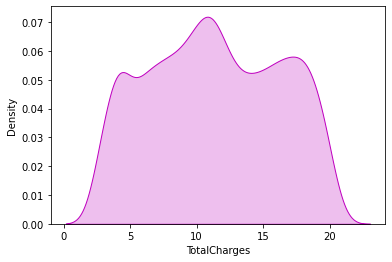

In [78]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df["TotalCharges"],color="m",kde_kws={"shade": True},hist=False)
plt.show()


#### Skewness from Total Charges has been removed

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> Now Lets Split the dataset into dependent and independent variable <h2>

In [79]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1


In [80]:
x=df.loc [:,df.columns != 'Churn']
# Independent Variable

In [81]:
y=df.loc[:,'Churn']
#Dependent Variable

In [82]:
x.shape

(7043, 19)

In [83]:
y.shape

(7043,)

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:orange'> Now Lets Scale The Dataset <h2>

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.685885
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205869
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346302
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183960
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.250087
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.654513
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.884843
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942107


#### We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

# Checking Multicollinearity using VIF Method

#### In the heat map we have found some features having high correlation between each other which means multicollinearity problem so let's check the VIF value to solve multicollinearity problem.

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [88]:
vif_cal()

    VIF FACTOR          FEATURES
0     1.001694            gender
1     1.149694     SeniorCitizen
2     1.462892           Partner
3     1.383773        Dependents
4    12.767881            tenure
5     1.622418      PhoneService
6     1.398163     MultipleLines
7     1.871514   InternetService
8     1.256319    OnlineSecurity
9     1.192573      OnlineBackup
10    1.288620  DeviceProtection
11    1.312948       TechSupport
12    1.445301       StreamingTV
13    1.443981   StreamingMovies
14    2.527197          Contract
15    1.203397  PaperlessBilling
16    1.180775     PaymentMethod
17    5.468368    MonthlyCharges
18   17.253682      TotalCharges


#### By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [89]:
# Dropping TotalCharges column bcoz vif is above 10..
x.drop("TotalCharges",axis=1,inplace=True)

In [90]:
# Now Lets check VIF again and see multicollinearity

def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [91]:
vif_cal()

    VIF FACTOR          FEATURES
0     1.001684            gender
1     1.149639     SeniorCitizen
2     1.460856           Partner
3     1.382106        Dependents
4     2.754468            tenure
5     1.622282      PhoneService
6     1.391652     MultipleLines
7     1.825876   InternetService
8     1.247696    OnlineSecurity
9     1.185932      OnlineBackup
10    1.280152  DeviceProtection
11    1.303573       TechSupport
12    1.443671       StreamingTV
13    1.442276   StreamingMovies
14    2.459201          Contract
15    1.202918  PaperlessBilling
16    1.180664     PaymentMethod
17    2.733024    MonthlyCharges


#### All the columns have VIF less than 10which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

In [92]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### So target variable is imbalanced

<AxesSubplot:xlabel='Churn', ylabel='count'>

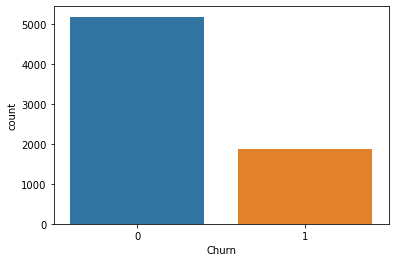

In [93]:
sns.countplot(y)

## lets balance imbalanced target variable

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

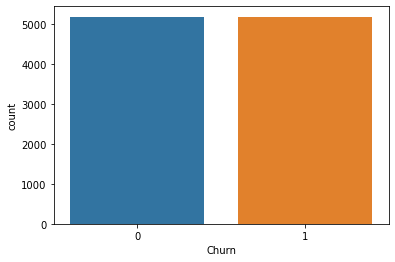

In [96]:
sns.countplot(y)

### Now dataset is balanced

# Model Training and Testing

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [98]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  4  The model performs very well
At random_state:- 4
Training accuaracy_score is :- 77.3
Testing accuracy_score is:- 77.3 


At random state  94  The model performs very well
At random_state:- 94
Training accuaracy_score is :- 77.4
Testing accuracy_score is:- 77.4 




In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=94)

In [101]:
lr.fit(x_train,y_train)

LogisticRegression()

In [102]:
pred_train=lr.predict(x_train)

In [103]:
pred_test=lr.predict(x_test)

In [104]:
accuracy_score(y_test,pred_test)

0.7739130434782608

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1021
           1       0.76      0.81      0.78      1049

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



## CV for Logistic Regression

In [107]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [108]:
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 77.10668728256668
Accuracy_score is :- 77.39130434782608


At cv:- 3
Cross validation score is :- 77.17441588474149
Accuracy_score is :- 77.39130434782608


At cv:- 4
Cross validation score is :- 77.22265172013915
Accuracy_score is :- 77.39130434782608


At cv:- 5
Cross validation score is :- 77.11647205235789
Accuracy_score is :- 77.39130434782608


At cv:- 6
Cross validation score is :- 77.2808377327191
Accuracy_score is :- 77.39130434782608


At cv:- 7
Cross validation score is :- 77.0971446765445
Accuracy_score is :- 77.39130434782608


At cv:- 8
Cross validation score is :- 77.01991970795066
Accuracy_score is :- 77.39130434782608


At cv:- 9
Cross validation score is :- 77.29051517177298
Accuracy_score is :- 77.39130434782608




In [109]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.771164720523579 
The accuracy_score is: 0.7739130434782608


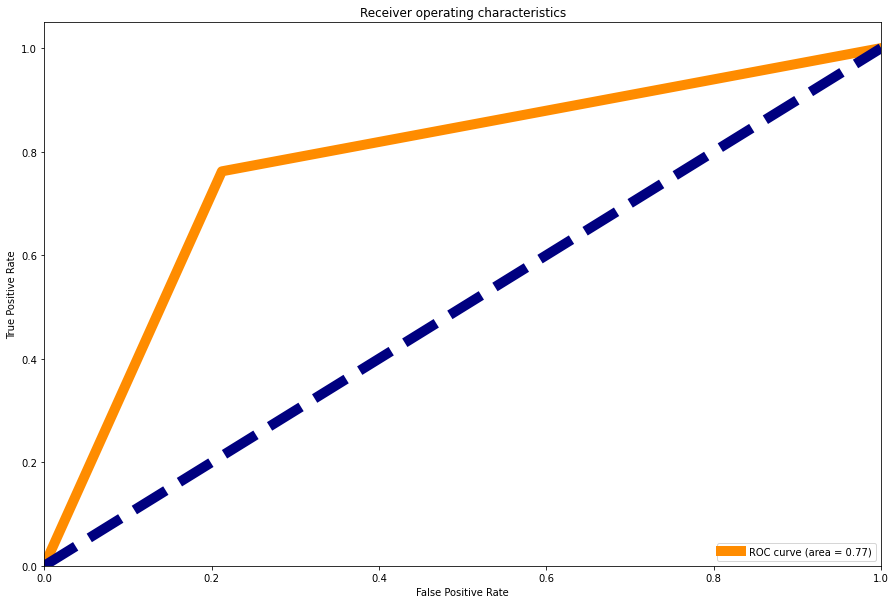

In [110]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression cover 77% under ROC Curve

# Decision Tree Classifier

In [111]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())

0.7913043478260869
[[812 209]
 [223 826]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1021
           1       0.80      0.79      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

CV  :- 0.7855719699357667


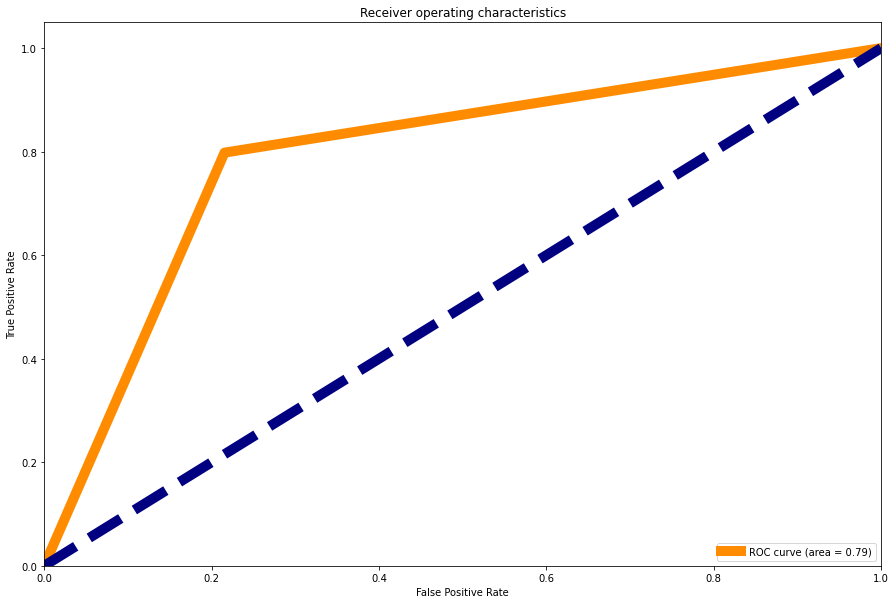

In [112]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### DTC is covering 79% under ROC Curve

# KNeighbors Classifiers

In [113]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())


0.7739130434782608
[[677 344]
 [124 925]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1021
           1       0.73      0.88      0.80      1049

    accuracy                           0.77      2070
   macro avg       0.79      0.77      0.77      2070
weighted avg       0.79      0.77      0.77      2070

CV  :- 0.782568395196634


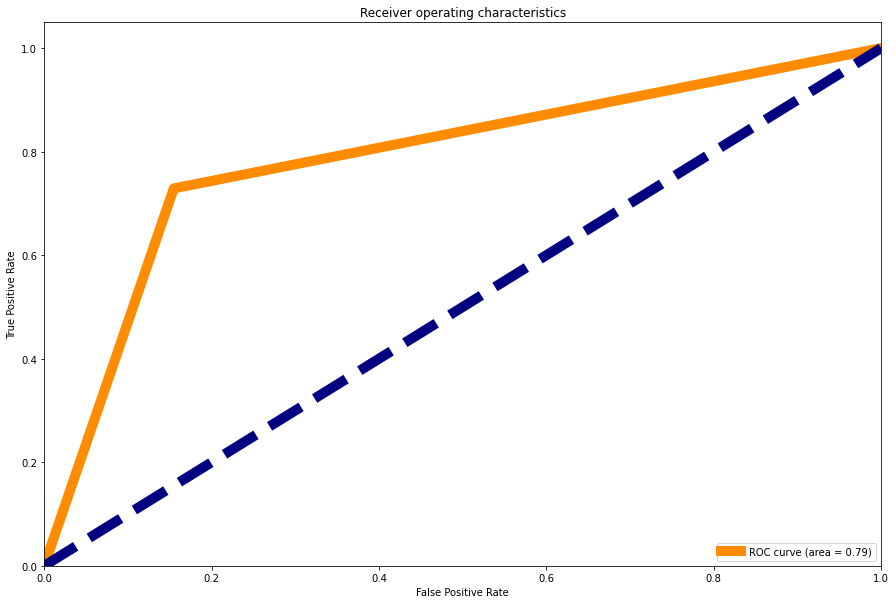

In [114]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### KN classifier is covering 79% under ROC Curve

# Ensemble Technique

In [115]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())

0.8555555555555555
[[872 149]
 [150 899]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

CV  :- 0.8511889568346163


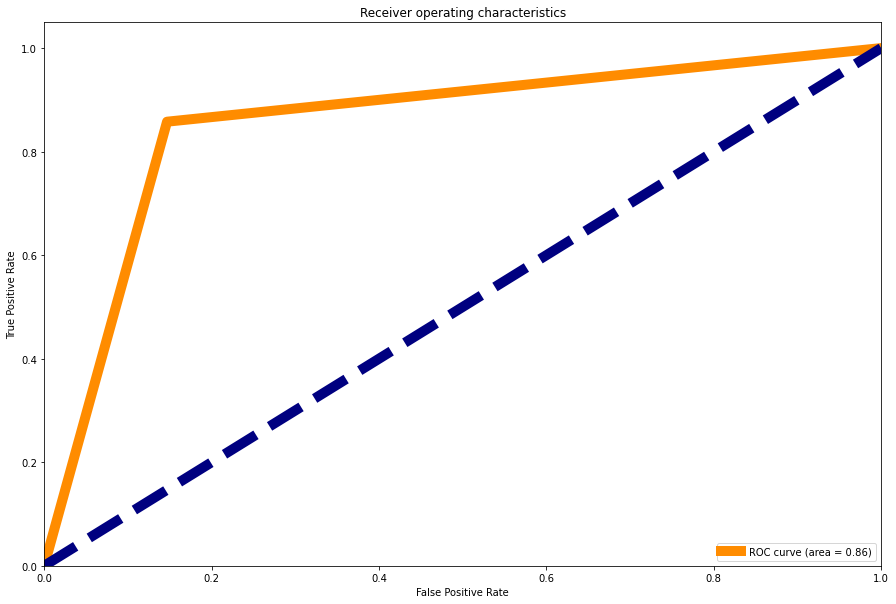

In [116]:
fpr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### RF Classifier is covering 86% under ROC Curve

In [117]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.8410628019323672
[[837 184]
 [145 904]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1021
           1       0.83      0.86      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

CV  :- 0.8323442676921567


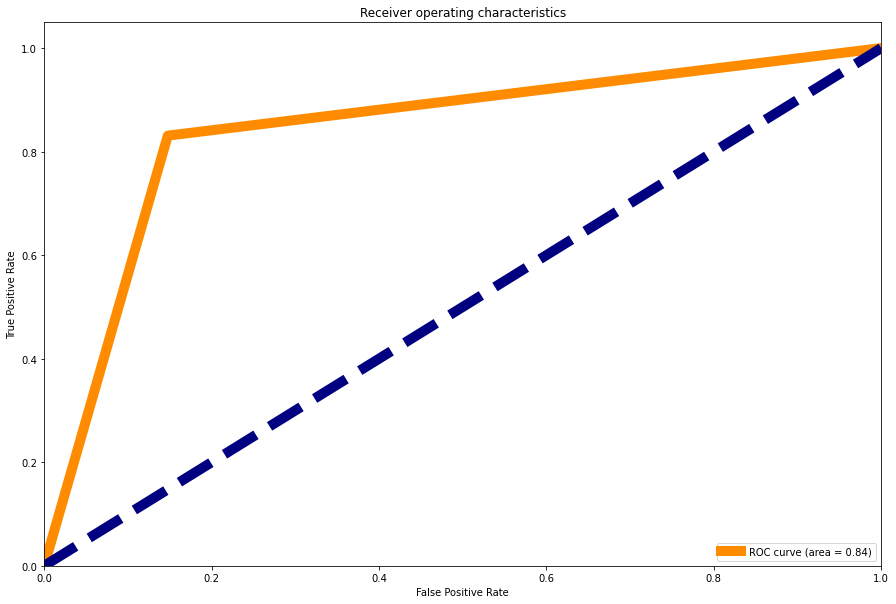

In [118]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### GB Classifier covering 84% under ROC Curve

In [119]:
from sklearn.ensemble import ExtraTreesClassifier

In [122]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

# Prediction
predet = et.predict(x_test)

print(accuracy_score(y_test, predet))
print(confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

print('CV  :-',cross_val_score(et,x,y,cv=5).mean())


0.8565217391304348
[[869 152]
 [145 904]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

CV  :- 0.8635568537625822


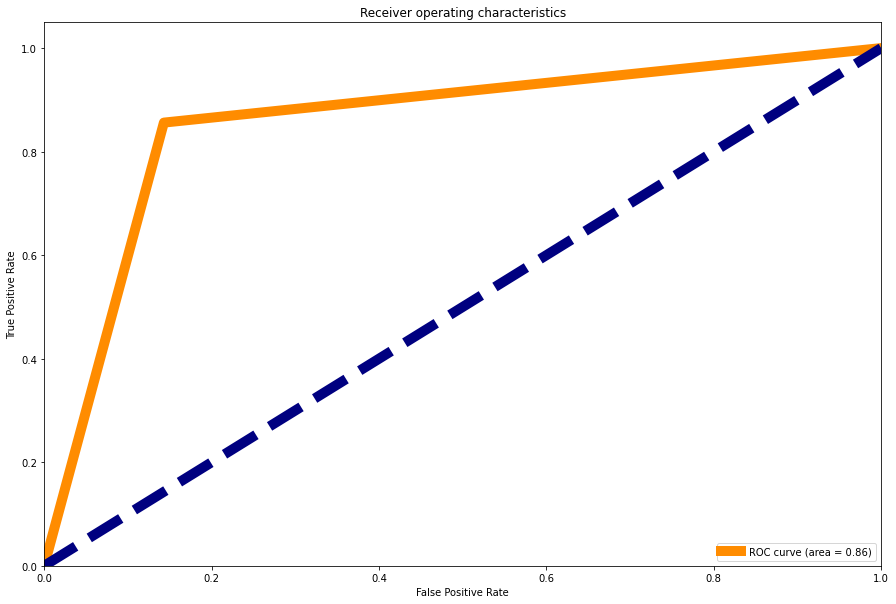

In [123]:
fpr,tpr,threshold=roc_curve(predet,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Extra tree Classifier is covering 86% under ROC Curve

In [124]:
mm=pd.DataFrame([["LR","77%","77%"],["Decision Tree Classifier","79%","79%"],["KNeighbors Classifier","77%","78%"],["Random Forest Classifier","86%","85%"],["Gradient Boosting","84%","83%"],["Extra Tree Classifier","86%","86%"]],
                    columns=["Model_Name","AccuracyScore","CV Score"])

mm

,Model_Name,AccuracyScore,CV Score
0,LR,77%,77%
1,Decision Tree Classifier,79%,79%
2,KNeighbors Classifier,77%,78%
3,Random Forest Classifier,86%,85%
4,Gradient Boosting,84%,83%
5,Extra Tree Classifier,86%,86%


#### From the difference between the accuracy score and the cross validation score we can conclude that ExtraTrees Classifer as our best fitting model whch is giving very less difference compare to other models

# Hyperparameter Tuning

In [125]:
et.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [126]:
#Extra Tree Classifier
parameters = {'criterion' : ['gini','entropy'],
              'warm_start' : [True,False],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'oob_score' : [True,False]}


In [127]:
from sklearn.model_selection import GridSearchCV
qq=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [128]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20], 'n_jobs': [-2, -1, 1],
                         'oob_score': [True, False],
                         'warm_start': [True, False]})

In [129]:
qq.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_jobs': -2,
 'oob_score': False,
 'warm_start': True}

In [130]:
gb = ExtraTreesClassifier(criterion ='gini',max_depth=20, warm_start=True,n_jobs=-2,oob_score=False)
et.fit(x_train, y_train)
pred = et.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  85.70048309178743


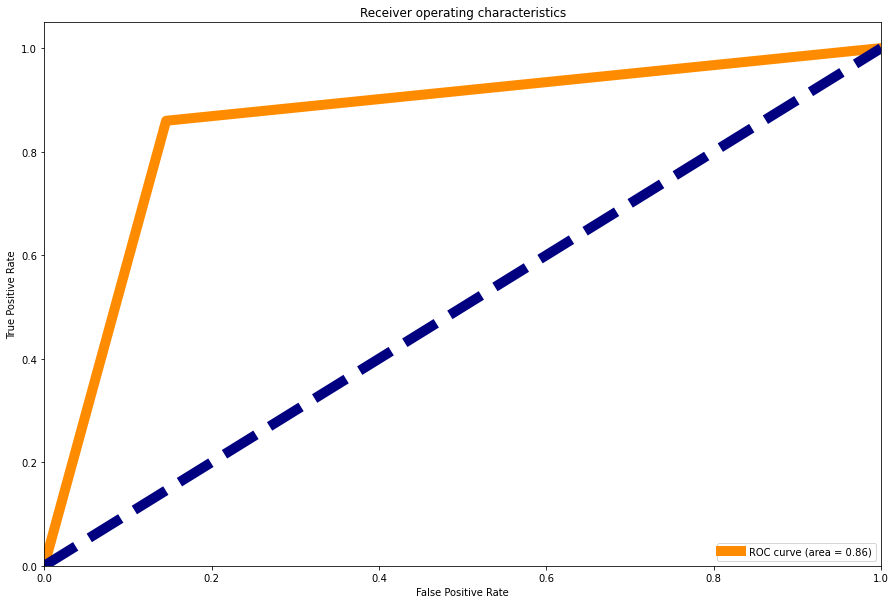

In [132]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### Our Final model is covering 86% under ROC Curve in Hyperparameter tuning

# Now saving the model

In [133]:
#Saving the model using .pkl
import joblib
joblib.dump(et,"churnclassif.pkl")

['churnclassif.pkl']

In [134]:
#Loading the saved model
aa=joblib.load("churnclassif.pkl")

# Conclusion

In [135]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 1, 0])

In [136]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069
Predicted,0,0,1,0,0,0,1,1,0,0,...,1,0,1,1,1,1,1,1,1,0
Original,0,0,1,0,0,0,1,1,1,0,...,0,0,1,0,1,0,1,1,1,1


## Our Prediction is nearly equal to original 

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^